# Panda exercise

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
s = pd.Series([3, 4, 16, -4, 97])
s

0     3
1     4
2    16
3    -4
4    97
dtype: int64

In [3]:
s.sort_values()

3    -4
0     3
1     4
2    16
4    97
dtype: int64

In [4]:
letters = pd.Series(np.random.choice(list('abcdefghijklmnopqrstuvwxyz'), 100))
numbers = pd.Series(np.random.choice(np.arange(1, 101), 100))

In [5]:
numbers.astype(float)

0     93.0
1     57.0
2     90.0
3     11.0
4     80.0
      ... 
95    26.0
96    20.0
97     5.0
98    58.0
99    41.0
Length: 100, dtype: float64

In [6]:
letters == 'a'

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [7]:
# returns all 'a's and their index
letters[letters == 'a']

26    a
79    a
83    a
dtype: object

In [8]:
numbers[numbers > 50]

0      93
1      57
2      90
4      80
6      52
11     83
12     95
13     78
17     66
18     87
19     95
20     93
21     81
24     89
25     54
27     87
30     66
33     91
34     59
35     89
37    100
40     61
42     71
45     61
49     92
50     88
51     69
52     55
54     59
56     59
57     70
61     95
62     55
67     93
68     53
69     74
72     68
74     68
75     84
77     75
79     76
81     56
87     54
88    100
89     95
91     58
93     88
98     58
dtype: int64

~ not's what ever we are looking at numbers[~ greater_than_ten]


In [9]:
vowels = list('aeiou')
vowels

['a', 'e', 'i', 'o', 'u']

In [10]:
letters.isin(vowels)

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98     True
99    False
Length: 100, dtype: bool

In [11]:
letters[letters.isin(vowels)]

12    i
13    i
14    e
15    u
17    o
19    i
22    u
26    a
28    e
38    u
41    e
44    o
51    e
58    u
63    e
65    e
66    u
68    u
70    e
76    u
79    a
80    e
81    e
83    a
85    e
87    o
98    i
dtype: object

aggregration in the "i did somthing to"

In [12]:
letters.isin(vowels).sum()

27

In [13]:
letters[letters.isin(vowels)].sum()

'iieuoiuaeueoeueeuueuaeeaeoi'

In [14]:
letters[letters.isin(vowels)].size

27

In [15]:
letters[letters.isin(vowels)].shape

(27,)

In [16]:
(letters == 'b').any()

True

In [17]:
(numbers > 0).all()

True

In [18]:
# this creates pandas.core.series.Series
letters[letters.isin(vowels)]

12    i
13    i
14    e
15    u
17    o
19    i
22    u
26    a
28    e
38    u
41    e
44    o
51    e
58    u
63    e
65    e
66    u
68    u
70    e
76    u
79    a
80    e
81    e
83    a
85    e
87    o
98    i
dtype: object

In [19]:
letters[letters.isin(vowels)].value_counts()

e    10
u     7
i     4
o     3
a     3
dtype: int64

In [20]:
letters[letters.isin(vowels)].mode()

0    e
dtype: object

In [21]:
letters[letters.isin(vowels)].value_counts().sort_values().tail(1)

e    10
dtype: int64

In [22]:
numbers.agg(['count', 'mean', 'std'])

count    100.000000
mean      47.510000
std       30.816661
dtype: float64

In [23]:
numbers.agg(['count', 'mean', 'std'])['mean']

47.51

In [24]:
numbers.agg(['count', 'mean', 'std'])[1]

47.51

In [25]:
number_summary = numbers.describe()
number_summary

count    100.000000
mean      47.510000
std       30.816661
min        1.000000
25%       20.000000
50%       49.500000
75%       74.250000
max      100.000000
dtype: float64

.apply() to use functions

In [26]:
numbers % 4 == 0

0     False
1     False
2     False
3     False
4      True
      ...  
95    False
96     True
97    False
98    False
99    False
Length: 100, dtype: bool

In [27]:
def is_divisible_by_4(n):
    if n % 4 == 0:
        return "Evenly divided by Four!"
    else:
        return "Not Evenly Divisible by Four"
    
numbers.apply(is_divisible_by_4)

0     Not Evenly Divisible by Four
1     Not Evenly Divisible by Four
2     Not Evenly Divisible by Four
3     Not Evenly Divisible by Four
4          Evenly divided by Four!
                  ...             
95    Not Evenly Divisible by Four
96         Evenly divided by Four!
97    Not Evenly Divisible by Four
98    Not Evenly Divisible by Four
99    Not Evenly Divisible by Four
Length: 100, dtype: object

In [28]:
def bin_number(n):
    if n < 25:
        return '[0, 25)'
    elif n < 50:
        return '[25, 50)'
    elif n < 75:
        return '[50, 75)'
    else:
        return '[75, 101)'

In [29]:
numbers.apply(bin_number)

0     [75, 101)
1      [50, 75)
2     [75, 101)
3       [0, 25)
4     [75, 101)
        ...    
95     [25, 50)
96      [0, 25)
97      [0, 25)
98     [50, 75)
99     [25, 50)
Length: 100, dtype: object

In [30]:
numbers.apply(bin_number).value_counts().sort_index()

[0, 25)      31
[25, 50)     19
[50, 75)     25
[75, 101)    25
dtype: int64

In [31]:
numbers.value_counts()

11    5
95    4
32    4
93    3
59    3
     ..
31    1
83    1
26    1
69    1
25    1
Length: 64, dtype: int64

In [32]:
numbers.value_counts(bins=4).sort_index()

(0.9, 25.75]      32
(25.75, 50.5]     20
(50.5, 75.25]     24
(75.25, 100.0]    24
dtype: int64

In [33]:
pd.cut(numbers, 4)

0     (75.25, 100.0]
1      (50.5, 75.25]
2     (75.25, 100.0]
3     (0.901, 25.75]
4     (75.25, 100.0]
           ...      
95     (25.75, 50.5]
96    (0.901, 25.75]
97    (0.901, 25.75]
98     (50.5, 75.25]
99     (25.75, 50.5]
Length: 100, dtype: category
Categories (4, interval[float64]): [(0.901, 25.75] < (25.75, 50.5] < (50.5, 75.25] < (75.25, 100.0]]

In [34]:
pd.cut(numbers, 4).value_counts().sort_index()

(0.901, 25.75]    32
(25.75, 50.5]     20
(50.5, 75.25]     24
(75.25, 100.0]    24
dtype: int64

In [35]:
pd.cut(numbers, 4).value_counts().sort_index(ascending=False)

(75.25, 100.0]    24
(50.5, 75.25]     24
(25.75, 50.5]     20
(0.901, 25.75]    32
dtype: int64

In [36]:
pd.cut(numbers, 4, labels=['very small', 'small', 'large', 'very large']).value_counts().sort_index()

very small    32
small         20
large         24
very large    24
dtype: int64

## Binning Data

- `pd.cut`  for: equal sized bins (but maybe not the same number of values in each bin)
- `pd.qcut` for: the same number of values in each bin (but the bins might have different widths)

In [37]:
# cut tries to make the bins sizes the same
pd.cut(numbers, 8).value_counts().sort_index()

(0.901, 13.375]    20
(13.375, 25.75]    12
(25.75, 38.125]    12
(38.125, 50.5]      8
(50.5, 62.875]     15
(62.875, 75.25]     9
(75.25, 87.625]     8
(87.625, 100.0]    16
dtype: int64

In [38]:
# qcut tries to make the bin values the same, instead of the range
pd.qcut(numbers, 8).value_counts().sort_index()

(0.999, 9.375]     13
(9.375, 20.0]      13
(20.0, 32.0]       14
(32.0, 49.5]       10
(49.5, 58.875]     12
(58.875, 74.25]    13
(74.25, 89.0]      13
(89.0, 100.0]      12
dtype: int64

# Vectorized String Operations

In [39]:
numbers.apply(is_divisible_by_4).str.lower()

0     not evenly divisible by four
1     not evenly divisible by four
2     not evenly divisible by four
3     not evenly divisible by four
4          evenly divided by four!
                  ...             
95    not evenly divisible by four
96         evenly divided by four!
97    not evenly divisible by four
98    not evenly divisible by four
99    not evenly divisible by four
Length: 100, dtype: object

In [40]:
# returns the first '4' char of each string
numbers.apply(is_divisible_by_4).str[:4]

0     Not 
1     Not 
2     Not 
3     Not 
4     Even
      ... 
95    Not 
96    Even
97    Not 
98    Not 
99    Not 
Length: 100, dtype: object

In [41]:
numbers.apply(is_divisible_by_4)[:4]

0    Not Evenly Divisible by Four
1    Not Evenly Divisible by Four
2    Not Evenly Divisible by Four
3    Not Evenly Divisible by Four
dtype: object

# Plotting

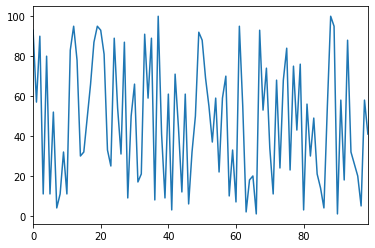

In [42]:
numbers.plot()

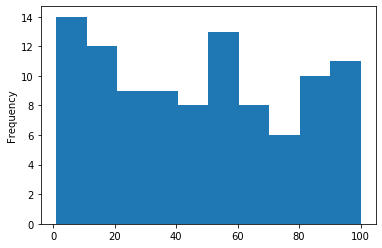

In [43]:
numbers.plot.hist()

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

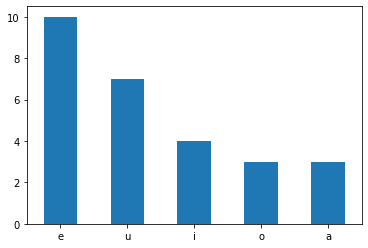

In [49]:
letters[letters.isin(vowels)].value_counts().plot.bar()
plt.xticks(rotation=0)

In [51]:
s3 = pd.Series([1, 2, 3])
s

0     3
1     4
2    16
3    -4
4    97
dtype: int64

In [53]:
s[0] = 16
s

0    16
1     4
2    16
3    -4
4    97
dtype: int64

In [54]:
pd.__version__

'0.25.1'